Predictive Analytics and Recommendation Systems in Banking

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV

from scipy import stats  # Import the stats module from scipy
import warnings
warnings.filterwarnings("ignore",category=pd.errors.SettingWithCopyWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore",category=UserWarning)
warnings.filterwarnings("ignore",category=DeprecationWarning)
from google.colab import files  # For uploading files in Google Colab


ModuleNotFoundError: No module named 'google.colab'

In [2]:
upload1 = files.upload()  # Upload the file
file_name= list(upload1.keys())[0]  # Get the uploaded file name
df = pd.read_csv("dataset.csv")  # Load the dataset into a DataFrame
print("Dataset Loaded Successfully!")


Saving dataset.csv to dataset.csv
Dataset Loaded Successfully!


In [3]:
df

,Customer_Id,Age,Monthly_Income,Credit_Score,Credit_Score_Band,Loan_Amount,Interest_Rate,Loan_Term,Loan_Type,Debt_Income,...,Transaction_Date,Transaction_Year,Transaction_Month,Product_Id,Product_Name,Interaction_Date,Interaction_Year,Interaction_Day_Name,Interaction_Type,Transaction_Frequency
0,C097,54,160943.40,743,Excellent,457137.44,4.08,48,Business,2.840362,...,2024-07-04,2024,7,P025,Medical Loan,2024-06-13,2024,Thursday,Viewed,6
1,C051,37,49256.81,441,Poor,313007.12,12.28,60,Personal,6.354596,...,2023-10-30,2023,10,P07,Business Loan,2023-10-27,2023,Friday,Clicked,6
2,C07,34,85454.68,677,Good,614366.58,5.83,36,Mortgage,7.189385,...,2024-03-17,2024,3,P019,Home Improvement Loan,2024-08-17,2024,Saturday,Clicked,2
3,C098,69,174697.89,367,Poor,184281.89,14.20,60,Personal,1.054860,...,2024-08-25,2024,8,P014,Certificate of Deposit,2024-07-01,2024,Monday,Viewed,2
4,C092,36,52850.45,826,Excellent,582025.38,6.83,36,Business,11.012685,...,2024-06-23,2024,6,P05,Home Loan,2024-07-21,2024,Sunday,Viewed,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,C040,60,37253.73,300,Poor,561512.51,9.23,12,Mortgage,15.072652,...,2024-04-17,2024,4,P021,Cash Credit,2024-07-14,2024,Sunday,Viewed,4
996,C043,32,102668.39,836,Excellent,858143.42,12.11,48,Personal,8.358400,...,2024-02-07,2024,2,P043,Money Market Account,2023-12-12,2023,Tuesday,Viewed,1
997,C019,26,67283.10,375,Poor,595755.30,8.69,36,Mortgage,8.854457,...,2024-04-23,2024,4,P038,Recurring Deposit,2024-03-10,2024,Sunday,Purchased,6
998,C038,25,37287.86,593,Fair,377240.30,12.42,36,Business,10.116974,...,2024-03-19,2024,3,P020,Gold Loan,2024-01-20,2024,Saturday,Clicked,9


In [4]:
df.shape

(1000, 25)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Customer_Id            1000 non-null   object 
 1   Age                    1000 non-null   int64  
 2   Monthly_Income         1000 non-null   float64
 3   Credit_Score           1000 non-null   int64  
 4   Credit_Score_Band      1000 non-null   object 
 5   Loan_Amount            1000 non-null   float64
 6   Interest_Rate          1000 non-null   float64
 7   Loan_Term              1000 non-null   int64  
 8   Loan_Type              1000 non-null   object 
 9   Debt_Income            1000 non-null   float64
 10  Repayment_Status       1000 non-null   int64  
 11  Transaction_Id         1000 non-null   object 
 12  Gender                 1000 non-null   object 
 13  Transaction_Amount     1000 non-null   float64
 14  Transaction_Type       1000 non-null   object 
 15  Trans

In [6]:
df.head()

,Customer_Id,Age,Monthly_Income,Credit_Score,Credit_Score_Band,Loan_Amount,Interest_Rate,Loan_Term,Loan_Type,Debt_Income,...,Transaction_Date,Transaction_Year,Transaction_Month,Product_Id,Product_Name,Interaction_Date,Interaction_Year,Interaction_Day_Name,Interaction_Type,Transaction_Frequency
0,C097,54,160943.40,743,Excellent,457137.44,4.08,48,Business,2.840362,...,2024-07-04,2024,7,P025,Medical Loan,2024-06-13,2024,Thursday,Viewed,6
1,C051,37,49256.81,441,Poor,313007.12,12.28,60,Personal,6.354596,...,2023-10-30,2023,10,P07,Business Loan,2023-10-27,2023,Friday,Clicked,6
2,C07,34,85454.68,677,Good,614366.58,5.83,36,Mortgage,7.189385,...,2024-03-17,2024,3,P019,Home Improvement Loan,2024-08-17,2024,Saturday,Clicked,2
3,C098,69,174697.89,367,Poor,184281.89,14.20,60,Personal,1.054860,...,2024-08-25,2024,8,P014,Certificate of Deposit,2024-07-01,2024,Monday,Viewed,2
4,C092,36,52850.45,826,Excellent,582025.38,6.83,36,Business,11.012685,...,2024-06-23,2024,6,P05,Home Loan,2024-07-21,2024,Sunday,Viewed,2


In [7]:
df.describe()

,Age,Monthly_Income,Credit_Score,Loan_Amount,Interest_Rate,Loan_Term,Debt_Income,Repayment_Status,Transaction_Amount,Transaction_Year,Transaction_Month,Interaction_Year,Transaction_Frequency
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,44.075000,109193.843920,563.938000,544665.894170,8.009460,35.220000,7.015365,0.2000,1006.239580,2023.691000,6.670000,2023.712000,5.174000
std,15.624452,51657.748547,155.547598,259321.882545,4.038228,17.041655,6.618746,0.4002,575.000541,0.462312,3.416837,0.453058,2.830855
min,18.000000,20106.890000,300.000000,100104.590000,1.020000,12.000000,0.581336,0.0000,6.390000,2023.000000,1.000000,2023.000000,1.000000
25%,30.750000,65154.147500,430.750000,329098.767500,4.525000,24.000000,2.971596,0.0000,499.707500,2023.000000,4.000000,2023.000000,2.000000
50%,44.000000,109892.910000,556.000000,537593.240000,8.040000,36.000000,4.901120,0.0000,998.610000,2024.000000,7.000000,2024.000000,6.000000
75%,58.000000,154118.522500,692.000000,765060.832500,11.292500,48.000000,8.375177,0.0000,1511.682500,2024.000000,10.000000,2024.000000,8.000000
max,70.000000,199790.780000,850.000000,999625.860000,14.990000,60.000000,46.189287,1.0000,1998.000000,2024.000000,12.000000,2024.000000,10.000000


In [8]:
df.isnull().sum()

,0
Customer_Id,0
Age,0
Monthly_Income,0
Credit_Score,0
Credit_Score_Band,0
Loan_Amount,0
Interest_Rate,0
Loan_Term,0
Loan_Type,0
Debt_Income,0


In [9]:
df.dtypes

,0
Customer_Id,object
Age,int64
Monthly_Income,float64
Credit_Score,int64
Credit_Score_Band,object
Loan_Amount,float64
Interest_Rate,float64
Loan_Term,int64
Loan_Type,object
Debt_Income,float64


In [10]:
df.duplicated().sum()

0

In [11]:
df.drop(['Customer_Id'],axis=1)

,Age,Monthly_Income,Credit_Score,Credit_Score_Band,Loan_Amount,Interest_Rate,Loan_Term,Loan_Type,Debt_Income,Repayment_Status,...,Transaction_Date,Transaction_Year,Transaction_Month,Product_Id,Product_Name,Interaction_Date,Interaction_Year,Interaction_Day_Name,Interaction_Type,Transaction_Frequency
0,54,160943.40,743,Excellent,457137.44,4.08,48,Business,2.840362,0,...,2024-07-04,2024,7,P025,Medical Loan,2024-06-13,2024,Thursday,Viewed,6
1,37,49256.81,441,Poor,313007.12,12.28,60,Personal,6.354596,0,...,2023-10-30,2023,10,P07,Business Loan,2023-10-27,2023,Friday,Clicked,6
2,34,85454.68,677,Good,614366.58,5.83,36,Mortgage,7.189385,0,...,2024-03-17,2024,3,P019,Home Improvement Loan,2024-08-17,2024,Saturday,Clicked,2
3,69,174697.89,367,Poor,184281.89,14.20,60,Personal,1.054860,0,...,2024-08-25,2024,8,P014,Certificate of Deposit,2024-07-01,2024,Monday,Viewed,2
4,36,52850.45,826,Excellent,582025.38,6.83,36,Business,11.012685,0,...,2024-06-23,2024,6,P05,Home Loan,2024-07-21,2024,Sunday,Viewed,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,60,37253.73,300,Poor,561512.51,9.23,12,Mortgage,15.072652,1,...,2024-04-17,2024,4,P021,Cash Credit,2024-07-14,2024,Sunday,Viewed,4
996,32,102668.39,836,Excellent,858143.42,12.11,48,Personal,8.358400,0,...,2024-02-07,2024,2,P043,Money Market Account,2023-12-12,2023,Tuesday,Viewed,1
997,26,67283.10,375,Poor,595755.30,8.69,36,Mortgage,8.854457,1,...,2024-04-23,2024,4,P038,Recurring Deposit,2024-03-10,2024,Sunday,Purchased,6
998,25,37287.86,593,Fair,377240.30,12.42,36,Business,10.116974,0,...,2024-03-19,2024,3,P020,Gold Loan,2024-01-20,2024,Saturday,Clicked,9


In [12]:
df["Transaction_Date"]=pd.to_datetime(df["Interaction_Date"])
df["Interaction_Date"]=pd.to_datetime(df["Interaction_Date"])
df["Transaction_Year"]=df["Transaction_Year"].astype("category")
df["Transaction_Month"]=df["Transaction_Month"].astype("category")
df["Interaction_Year"]=df["Interaction_Year"].astype("category")
df[df.select_dtypes(include="object").columns]=df.select_dtypes(include="object").astype("category")

In [13]:
df.dtypes

,0
Customer_Id,category
Age,int64
Monthly_Income,float64
Credit_Score,int64
Credit_Score_Band,category
Loan_Amount,float64
Interest_Rate,float64
Loan_Term,int64
Loan_Type,category
Debt_Income,float64


Exploratory Data Analysis

In [14]:
#numerical columns
num_columns=["Age","Monthly_Income","Credit_Score","Loan_Amount","Interest_Rate","Loan_Term","Debt_Income","Transaction_Amount","Transaction_Frequency"]

In [16]:
# Adjust the layout to accommodate all numerical columns
num_cols = len(num_columns)


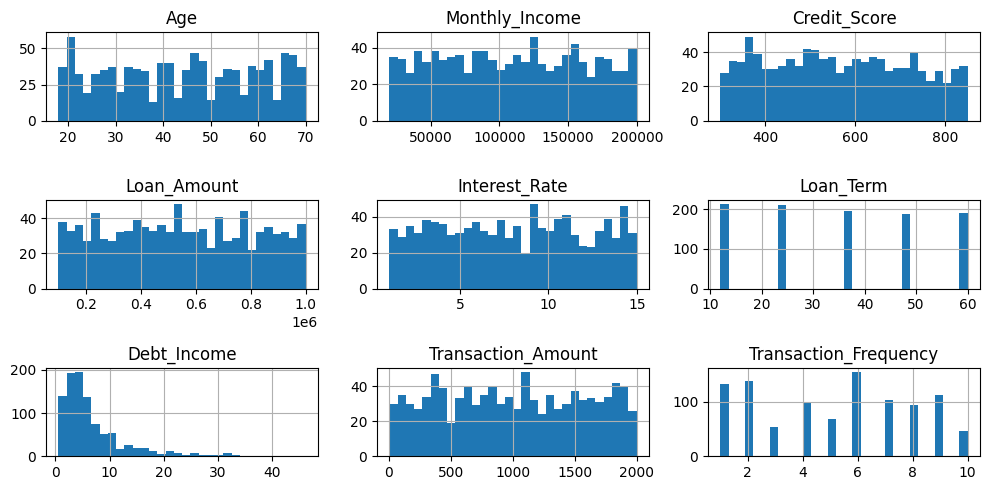

In [18]:
#histplot-distribution of data
df[num_columns].hist(figsize=(10,5),bins=30,layout=(3,3))
plt.tight_layout()
plt.show()

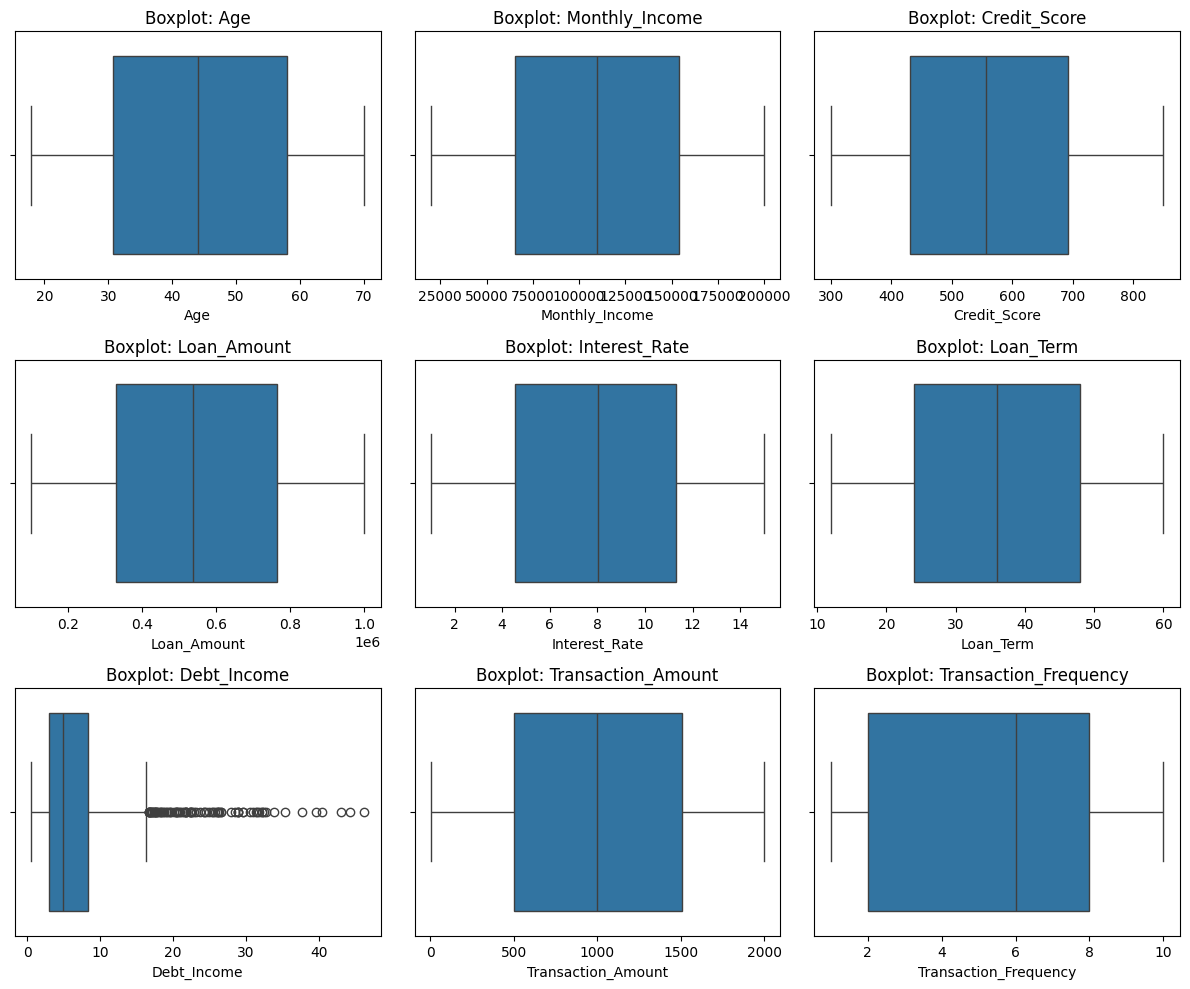

In [19]:
#Boxplot-outlier detection
fig,axes=plt.subplots(3,3,figsize=(12,10))
axes=axes.flatten()
for ax,column in zip(axes,num_columns):
    sns.boxplot(x=df[column],ax=ax)
    ax.set_title(f"Boxplot: {column}")
    ax.set_xlabel(column)

plt.tight_layout()
plt.show()

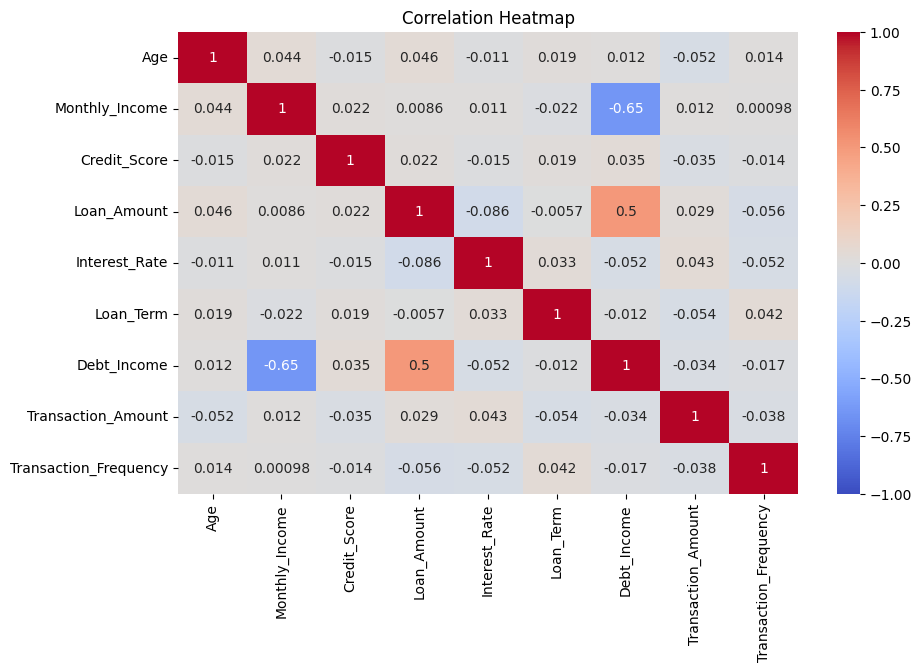

In [20]:
#correlation matrix
co_mat=df[num_columns].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(co_mat, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Heatmap")
plt.show()

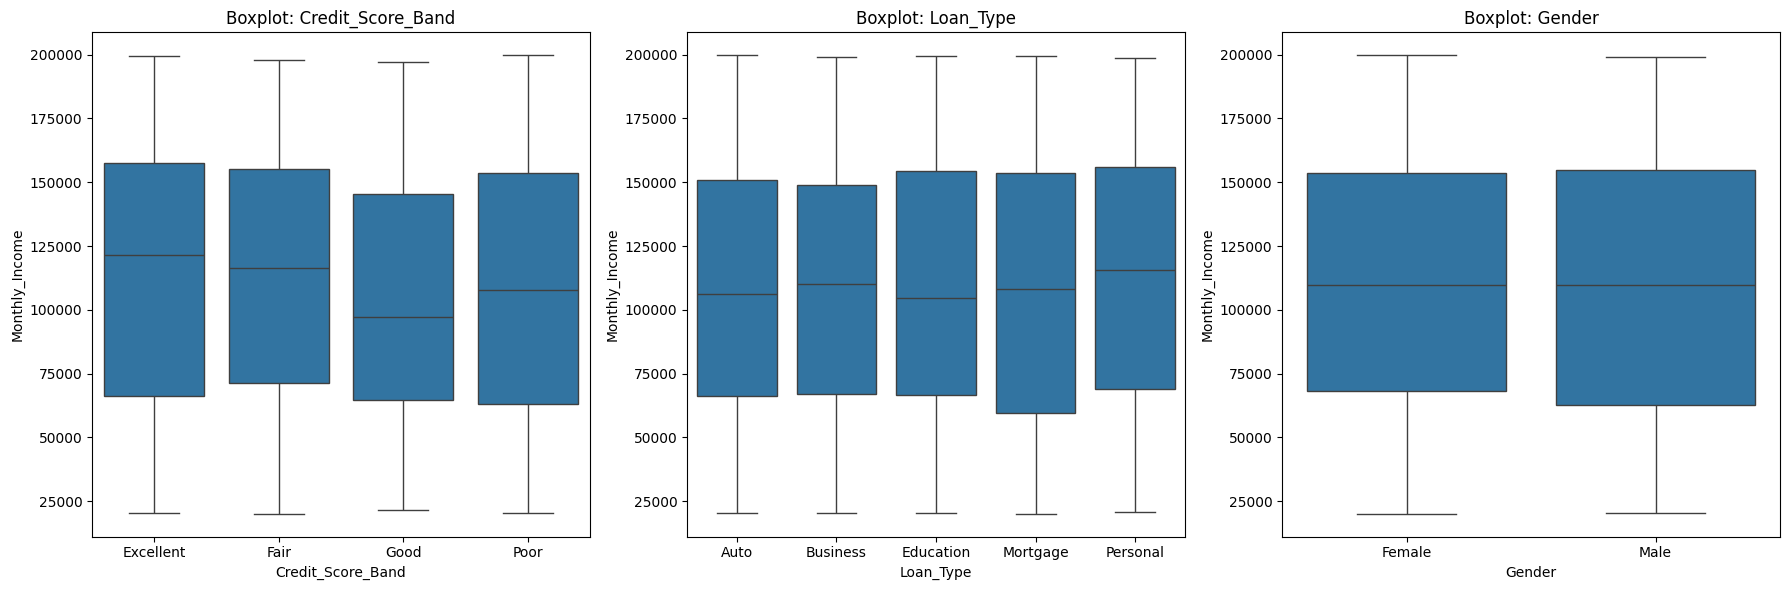

In [21]:
fig,axes=plt.subplots(1,3,figsize=(18,6))
axes=axes.flatten()
for ax,column in zip(axes,['Credit_Score_Band', 'Loan_Type', 'Gender']):
    # sb.violinplot(x=column,y='Monthly_Income',data=df,ax=ax)
    sns.boxplot(x=column, y='Monthly_Income', data=df, ax=ax)
    ax.set_title(f"Boxplot: {column}")
    ax.set_xlabel(column)

plt.tight_layout()
plt.show()

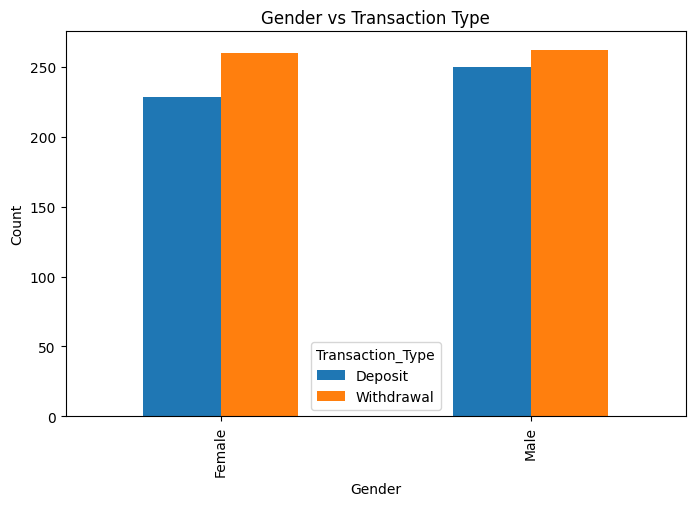

In [22]:
# Crosstab and stacked bar chart for categorical vs categorical
pd.crosstab(df['Gender'], df['Transaction_Type']).plot(kind='bar', figsize=(8, 5))
plt.title("Gender vs Transaction Type")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()


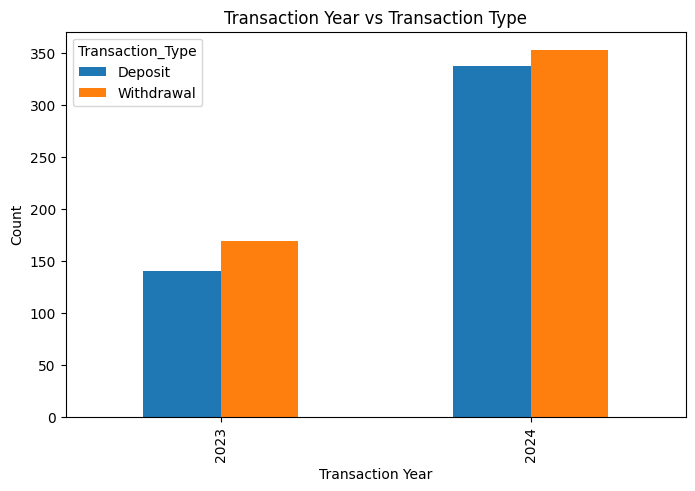

In [23]:
pd.crosstab(df['Transaction_Year'], df['Transaction_Type']).plot(kind='bar', figsize=(8, 5))
plt.title("Transaction Year vs Transaction Type")
plt.xlabel("Transaction Year")
plt.ylabel("Count")
plt.show()

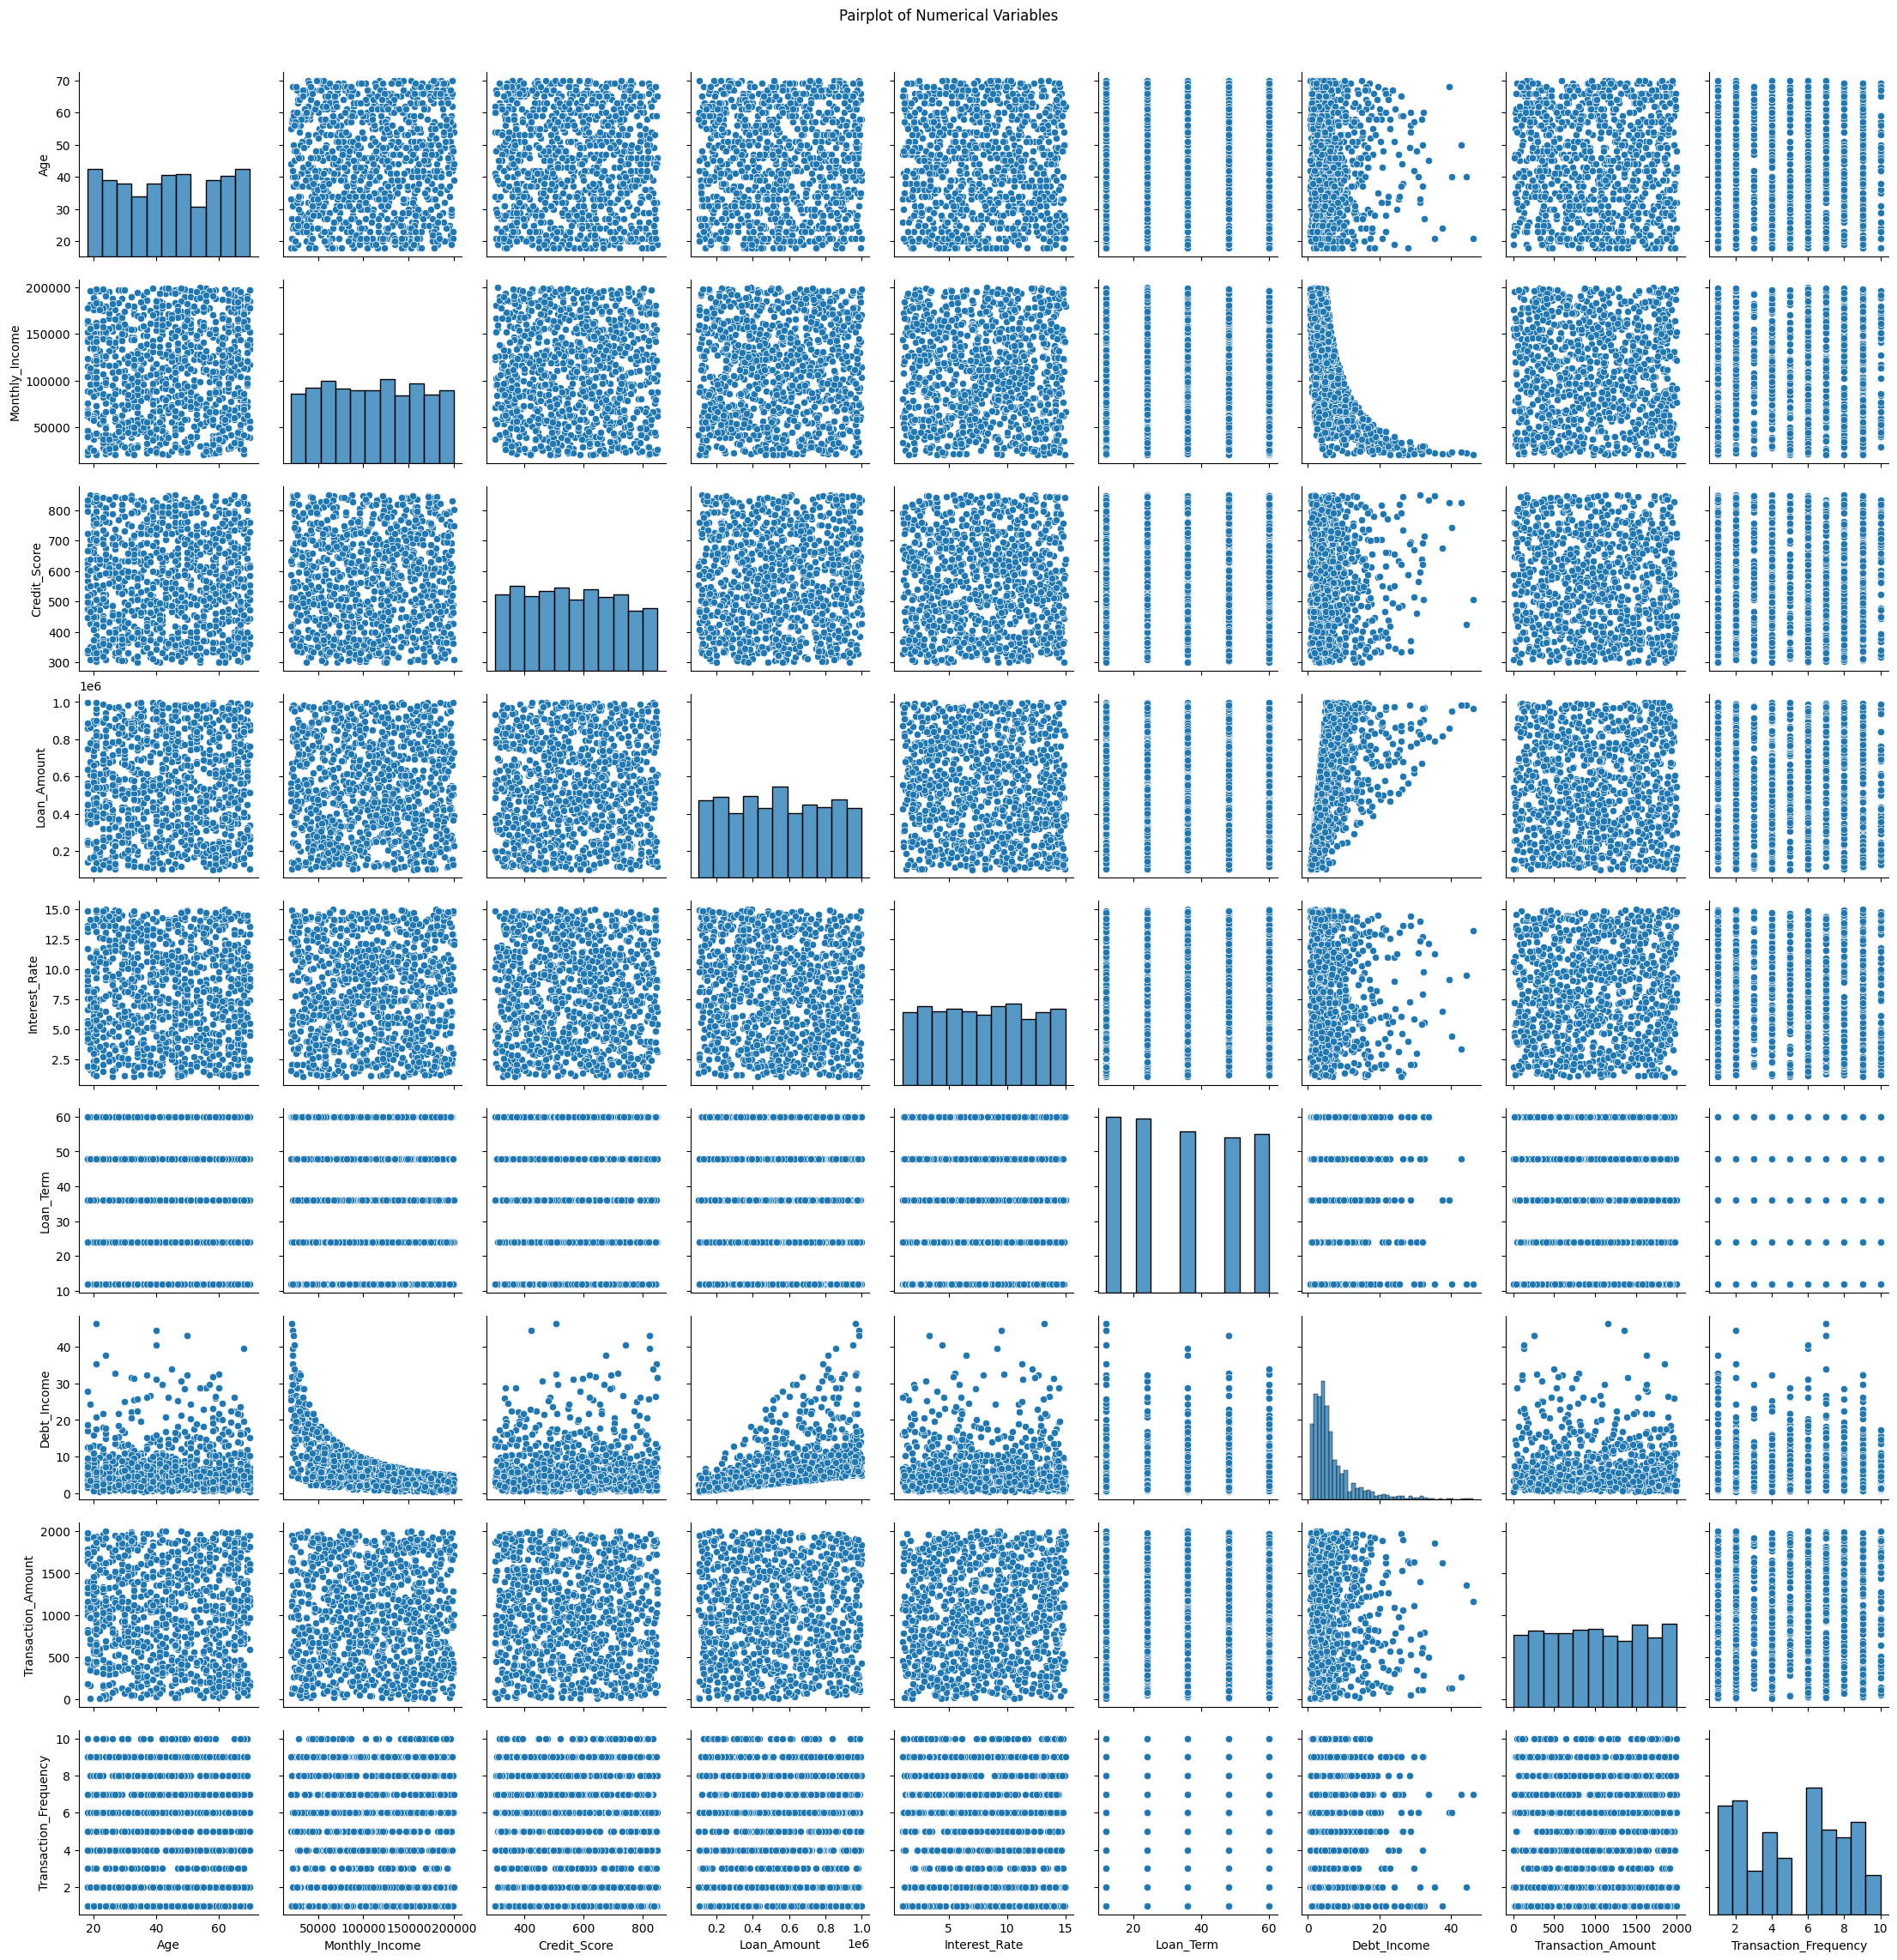

In [24]:
sns.pairplot(df[num_columns])
plt.suptitle('Pairplot of Numerical Variables', y=1.02)
plt.show()

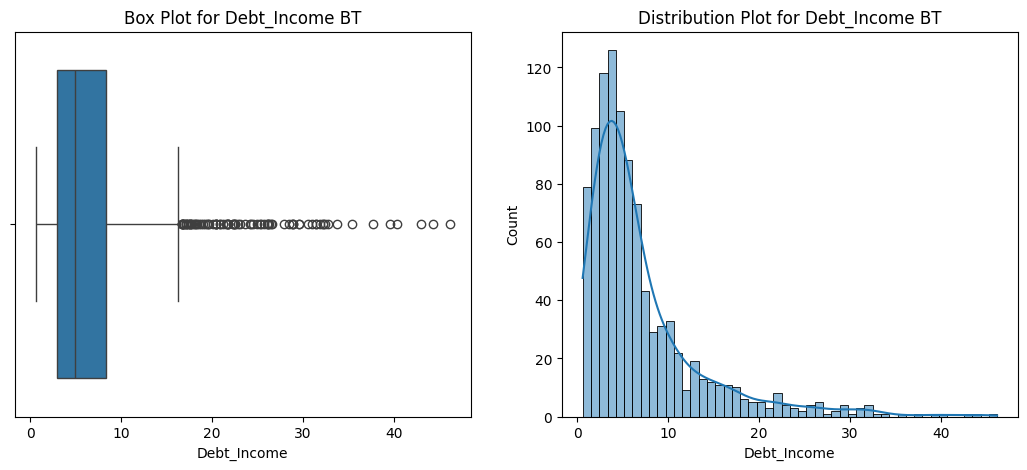

In [25]:
col_to_check_skew=["Debt_Income"]
for i in col_to_check_skew:
        plt.figure(figsize=(20,5))

        plt.subplot(1,3,1)
        sns.boxplot(data=df,x=i)
        plt.title(f"Box Plot for {i} BT")

        plt.subplot(1,3,2)
        sns.histplot(data=df,x=i,kde=True,bins=50)
        plt.title(f"Distribution Plot for {i} BT")


In [26]:
#function-to check skewness
def check_skew(df,num_columns):
    skewness_i={}
    for i in num_columns:
        if pd.api.types.is_numeric_dtype(df[i]):

            skewness=df[i].skew()
        if skewness>0.5:
            skew_type="Positively Skewed"
        elif skewness<-0.5:
            skew_type="Negatively skewed"
        else:
            skew_type="Symmetric"

        skewness_i[i]={
            "skewness_value":skewness,
            "skew Type":skew_type
        }
    return pd.DataFrame(skewness_i)

In [27]:
check_skew(df,num_columns)

,Age,Monthly_Income,Credit_Score,Loan_Amount,Interest_Rate,Loan_Term,Debt_Income,Transaction_Amount,Transaction_Frequency
skewness_value,-0.013796,0.020628,0.092658,0.032539,0.014296,0.070794,2.357657,0.010942,-0.015486
skew Type,Symmetric,Symmetric,Symmetric,Symmetric,Symmetric,Symmetric,Positively Skewed,Symmetric,Symmetric


In [28]:
#skewness treatment
df["Debt_To_Income_Log"]=np.log1p(df["Debt_Income"])
df["Debt_To_Income_sqrt"]=np.sqrt(df["Debt_Income"])
df["Debt_To_Income_box_cox"],_=stats.boxcox(df["Debt_Income"]+1)





In [29]:
print("log",df["Debt_To_Income_Log"].skew())
print("sqrt",df["Debt_To_Income_sqrt"].skew())
print("boxcox",df["Debt_To_Income_box_cox"].skew())



log 0.423129556490932
sqrt 1.1912250135251354
boxcox 0.018981526395130423


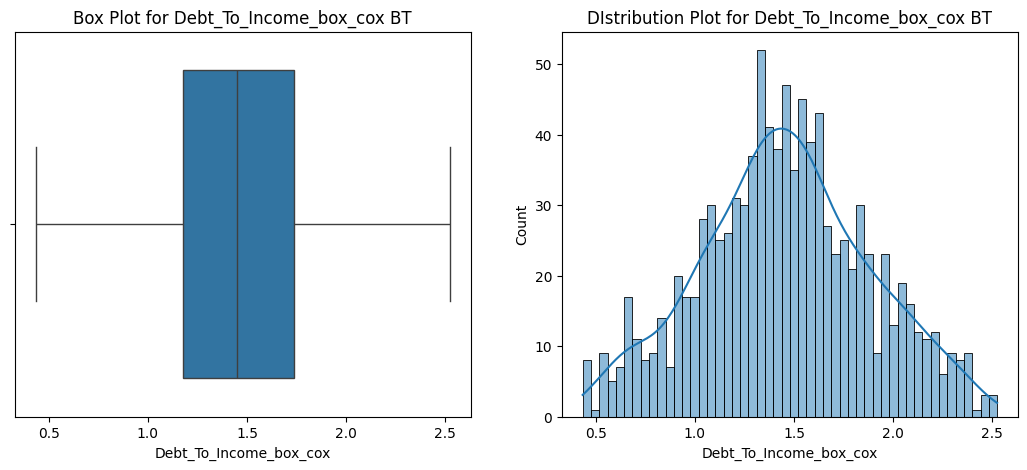

In [30]:
#Plotting after the treatment
treated_skew=["Debt_To_Income_box_cox"]
for i in treated_skew:
        plt.figure(figsize=(20,5))

        plt.subplot(1,3,1)
        sns.boxplot(data=df,x=i)
        plt.title(f"Box Plot for {i} BT")

        plt.subplot(1,3,2)
        sns.histplot(data=df,x=i,kde=True,bins=50)
        plt.title(f"DIstribution Plot for {i} BT")

        treated_skew=["Repayment_To_Status_box_cox"]


In [32]:
X=df[["Age","Monthly_Income","Credit_Score","Credit_Score_Band","Loan_Amount","Interest_Rate","Loan_Term","Loan_Type","Debt_Income"]]
y=df["Repayment_Status"]

#encoding
from imblearn.over_sampling import SMOTE

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
X["Credit_Score_Band"] = le.fit_transform(X["Credit_Score_Band"])
X["Loan_Type"] = le.fit_transform(X["Loan_Type"])
X["Debt_Income_log"]=np.log1p(X["Debt_Income"])
X=X.drop(columns=["Debt_Income"])

scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.3,random_state=42)

smote=SMOTE()
x_smote,y_smote=smote.fit_resample(X_train,y_train)

lr_sm=LogisticRegression(random_state=42)
lr_sm.fit(x_smote,y_smote)

y_pred_lr=lr_sm.predict(X_test)

y_pred_lr_proba = lr_sm.predict_proba(X_test)[:, 1]

roc_auc_lr = roc_auc_score(y_test, y_pred_lr_proba)

accuracy_lr=accuracy_score(y_test, y_pred_lr)
precision_scr_lr=precision_score(y_test, y_pred_lr)
recall_scr_lr=recall_score(y_test, y_pred_lr)
f1_scr_lr=f1_score(y_test, y_pred_lr)
roc_auc_lr=roc_auc_lr
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Logistic Regression Precision:", precision_score(y_test, y_pred_lr))
print("Logistic Regression Recall:", recall_score(y_test, y_pred_lr))
print("Logistic Regression F1-Score:", f1_score(y_test, y_pred_lr))
print("Logistic Regression ROC-AUC Score:", roc_auc_lr)

Logistic Regression Accuracy: 0.7966666666666666
Logistic Regression Precision: 0.49473684210526314
Logistic Regression Recall: 0.7833333333333333
Logistic Regression F1-Score: 0.6064516129032258
Logistic Regression ROC-AUC Score: 0.856875


In [33]:
#checking for imbalanced data
y_smote.value_counts()

,count
Repayment_Status,
0,560
1,560


In [36]:
#Hyperparameter Tuning for Logistion Regression
from imblearn.over_sampling import SMOTE
X=df[["Age","Monthly_Income","Credit_Score","Credit_Score_Band","Loan_Amount","Interest_Rate","Loan_Term","Loan_Type","Debt_Income"]]
y=df["Repayment_Status"]

le_credict=LabelEncoder()
X["Credit_Score_Band"] = le_credict.fit_transform(X["Credit_Score_Band"])

le_loan=LabelEncoder()
X["Loan_Type"] = le_loan.fit_transform(X["Loan_Type"])

X["Debt_Income_log"]=np.log1p(X["Debt_Income"])

X=X.drop(columns=["Debt_Income"])

scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.3,random_state=42)

smote=SMOTE()
x_smote,y_smote=smote.fit_resample(X_train,y_train)

lr_sm=LogisticRegression(random_state=42)
lr_sm.fit(x_smote,y_smote)

param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga'],
    'max_iter' : [100, 200, 300]
}

scoring = make_scorer(f1_score)
grid_search = GridSearchCV(
    estimator=LogisticRegression(random_state=42),
    param_grid=param_grid,
    scoring=scoring,
    cv=5,
    n_jobs=-1
)

grid_search.fit(x_smote, y_smote)

print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)
y_pred_best_proba=best_model.predict_proba(X_test)[:,1]

accuracy_lr_at=accuracy_score(y_test, y_pred_best)
precision_scr_lr_at=precision_score(y_test, y_pred_best)
recall_scr_lr_at=recall_score(y_test, y_pred_best)
f1_score_lr_at=f1_score(y_test, y_pred_best)
roc_auc_lr_at=roc_auc_score(y_test, y_pred_best_proba)
print("Best Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_best))
print("Best Logistic Regression Precision:", precision_score(y_test, y_pred_best))
print("Best Logistic Regression Recall:", recall_score(y_test, y_pred_best))
print("Best Logistic Regression F1-Score:", f1_score(y_test, y_pred_best))
print("Best Logistic Regression ROC-AUC Score:", roc_auc_score(y_test, y_pred_best_proba))

Best Parameters: {'C': 0.1, 'max_iter': 100, 'penalty': 'l1', 'solver': 'saga'}
Best Score: 0.8455365833772912
Best Logistic Regression Accuracy: 0.8233333333333334
Best Logistic Regression Precision: 0.5421686746987951
Best Logistic Regression Recall: 0.75
Best Logistic Regression F1-Score: 0.6293706293706294
Best Logistic Regression ROC-AUC Score: 0.8636111111111111


In [37]:
#checking the prediction for repayment status
input_data=pd.DataFrame({
    "Age":[64],
    "Monthly_Income":[78007.72],
    "Credit_Score":[515],
    "Credit_Score_Band":["Poor"],
    "Loan_Amount":[605969.14],
    "Interest_Rate":[11.80],
    "Loan_Term":[36],
    "Loan_Type":["Auto"],
    "Debt_Income":[7.768066]
})

input_data["Credit_Score_Band"] = le_credict.transform(input_data["Credit_Score_Band"])
input_data["Loan_Type"] = le_loan.transform(input_data["Loan_Type"])
input_data["Debt_Income_log"]=np.log1p(input_data["Debt_Income"])

X_sample = input_data[[
    "Age", "Monthly_Income", "Credit_Score",
    "Credit_Score_Band", "Loan_Amount",
    "Interest_Rate", "Loan_Term", "Loan_Type",
    "Debt_Income_log"
]]

X_sample_Scaled=scaler.transform(X_sample)
prediction = lr_sm.predict(X_sample_Scaled)
print("Predicted Repayment Status:", prediction[0])

Predicted Repayment Status: 0


In [38]:
#checking the prediction for repayment status
input_data=pd.DataFrame({
    "Age":[64],
    "Monthly_Income":[78007.72],
    "Credit_Score":[515],
    "Credit_Score_Band":["Poor"],
    "Loan_Amount":[605969.14],
    "Interest_Rate":[11.80],
    "Loan_Term":[36],
    "Loan_Type":["Auto"],
    "Debt_Income":[7.768066]
})

input_data["Credit_Score_Band"] = le_credict.transform(input_data["Credit_Score_Band"])
input_data["Loan_Type"] = le_loan.transform(input_data["Loan_Type"])
input_data["Debt_Income_log"]=np.log1p(input_data["Debt_Income"])

X_sample = input_data[[
    "Age", "Monthly_Income", "Credit_Score",
    "Credit_Score_Band", "Loan_Amount",
    "Interest_Rate", "Loan_Term", "Loan_Type",
    "Debt_Income_log"
]]

X_sample_Scaled=scaler.transform(X_sample)
prediction = lr_sm.predict(X_sample_Scaled)
print("Predicted Repayment Status:", prediction[0])

Predicted Repayment Status: 0


In [39]:
#checking the prediction for repayment status
input_data=pd.DataFrame({
    "Age":[25],
    "Monthly_Income":[32017.29],
    "Credit_Score":[647],
    "Credit_Score_Band":["Fair"],
    "Loan_Amount":[313237.82],
    "Interest_Rate":[10.65],
    "Loan_Term":[36],
    "Loan_Type":["Auto"],
    "Debt_Income":[9.783396]
})

input_data["Credit_Score_Band"] = le_credict.transform(input_data["Credit_Score_Band"])
input_data["Loan_Type"] = le_loan.transform(input_data["Loan_Type"])
input_data["Debt_Income_log"]=np.log1p(input_data["Debt_Income"])

X_sample = input_data[[
    "Age", "Monthly_Income", "Credit_Score",
    "Credit_Score_Band", "Loan_Amount",
    "Interest_Rate", "Loan_Term", "Loan_Type",
    "Debt_Income_log"
]]

X_sample_Scaled=scaler.transform(X_sample)
prediction = lr_sm.predict(X_sample_Scaled)
print("Predicted Repayment Status:", prediction[0])

Predicted Repayment Status: 1


In [41]:
#decision tree
X=df[["Age","Monthly_Income","Credit_Score","Credit_Score_Band","Loan_Amount","Interest_Rate","Loan_Term","Loan_Type","Debt_Income"]]
y=df["Repayment_Status"]

#encoding
le=LabelEncoder()
X["Credit_Score_Band"] = le.fit_transform(X["Credit_Score_Band"])
X["Loan_Type"] = le.fit_transform(X["Loan_Type"])
X["Debt_Income_log"]=np.log1p(X["Debt_Income"])
X = X.drop(columns=["Debt_Income"])

scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.3,random_state=42)

smote=SMOTE()
x_smote,y_smote=smote.fit_resample(X_train,y_train)

dt_sm=DecisionTreeClassifier(random_state=42)
dt_sm.fit(x_smote,y_smote)

y_pred_dt=dt_sm.predict(X_test)

y_pred_dt_proba= dt_sm.predict_proba(X_test)[:, 1]

roc_auc_dt = roc_auc_score(y_test, y_pred_dt_proba)


accuracy_dt=accuracy_score(y_test, y_pred_dt)
precision_scr_dt=precision_score(y_test, y_pred_dt)
recall_scr_dt=recall_score(y_test, y_pred_dt)
f1_scr_dt=f1_score(y_test, y_pred_dt)
roc_auc_dt=roc_auc_dt
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Decision Tree Precision:", precision_score(y_test, y_pred_dt))
print("Decision Tree Recall:", recall_score(y_test, y_pred_dt))
print("Decision Tree F1-Score:", f1_score(y_test, y_pred_dt))
print("Decision Tree Classifier ROC-AUC Score:", roc_auc_dt)

Decision Tree Accuracy: 0.7966666666666666
Decision Tree Precision: 0.4931506849315068
Decision Tree Recall: 0.6
Decision Tree F1-Score: 0.5413533834586466
Decision Tree Classifier ROC-AUC Score: 0.7229166666666668


In [42]:
#hyperparameter
dt_sm=DecisionTreeClassifier(random_state=42)
dt_sm.fit(x_smote,y_smote)

param_grid_dt={
    "max_depth":[5, 10, 15, 20, 25],
    "min_samples_split":[2, 5, 10, 20],
    "min_samples_leaf":[1, 2, 5, 10],
    "criterion":["gini","entropy"]
}

scoring=make_scorer(f1_score)

grid_search_dt=GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),
                            param_grid=param_grid_dt,
                            scoring=scoring,
                            cv=5)

grid_search_dt.fit(x_smote,y_smote)

print("Best Parameters for Decision Tree:", grid_search_dt.best_params_)
print("Best F1-Score:", grid_search_dt.best_score_)

best_dt_model=grid_search_dt.best_estimator_

y_pred_best_dt=best_dt_model.predict(X_test)
y_pred_best_dt_proba = best_dt_model.predict_proba(X_test)[:, 1]

accuracy_dt_at=accuracy_score(y_test, y_pred_best_dt)
precision_scr_dt_at=precision_score(y_test, y_pred_best_dt)
recall_scr_dt_at=recall_score(y_test, y_pred_best_dt)
f1_score_dt_at=f1_score(y_test, y_pred_best_dt)
roc_auc_dt_at=roc_auc_score(y_test, y_pred_best_dt_proba)
print("Best Decision Tree Accuracy:", accuracy_score(y_test, y_pred_best_dt))
print("Best Decision Tree Precision:", precision_score(y_test, y_pred_best_dt))
print("Best Decision Tree Recall:", recall_score(y_test, y_pred_best_dt))
print("Best Decision Tree F1-Score:", f1_score(y_test, y_pred_best_dt))
print("Best Decision Tree ROC-AUC Score:", roc_auc_score(y_test, y_pred_best_dt_proba))

Best Parameters for Decision Tree: {'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best F1-Score: 0.8497934919501795
Best Decision Tree Accuracy: 0.7766666666666666
Best Decision Tree Precision: 0.4533333333333333
Best Decision Tree Recall: 0.5666666666666667
Best Decision Tree F1-Score: 0.5037037037037037
Best Decision Tree ROC-AUC Score: 0.6979166666666666


In [43]:
#checking the prediction for repayment status
input_data=pd.DataFrame({
    "Age":[64],
    "Monthly_Income":[78007.72],
    "Credit_Score":[515],
    "Credit_Score_Band":["Poor"],
    "Loan_Amount":[605969.14],
    "Interest_Rate":[11.80],
    "Loan_Term":[36],
    "Loan_Type":["Auto"],
    "Debt_Income":[7.768066]
})

input_data["Credit_Score_Band"] = le_credict.transform(input_data["Credit_Score_Band"])
input_data["Loan_Type"] = le_loan.transform(input_data["Loan_Type"])
input_data["Debt_Income_log"]=np.log1p(input_data["Debt_Income"])

X_sample = input_data[[
    "Age", "Monthly_Income", "Credit_Score",
    "Credit_Score_Band", "Loan_Amount",
    "Interest_Rate", "Loan_Term", "Loan_Type",
    "Debt_Income_log"
]]

X_sample_Scaled=scaler.transform(X_sample)
prediction = lr_sm.predict(X_sample_Scaled)
print("Predicted Repayment Status:", prediction[0])

Predicted Repayment Status: 0


In [44]:
#checking the prediction for repayment status
input_data=pd.DataFrame({
    "Age":[25],
    "Monthly_Income":[32017.29],
    "Credit_Score":[647],
    "Credit_Score_Band":["Fair"],
    "Loan_Amount":[313237.82],
    "Interest_Rate":[10.65],
    "Loan_Term":[36],
    "Loan_Type":["Auto"],
    "Debt_Income":[9.783396]
})

input_data["Credit_Score_Band"] = le_credict.transform(input_data["Credit_Score_Band"])
input_data["Loan_Type"] = le_loan.transform(input_data["Loan_Type"])
input_data["Debt_Income_log"]=np.log1p(input_data["Debt_Income"])

X_sample = input_data[[
    "Age", "Monthly_Income", "Credit_Score",
    "Credit_Score_Band", "Loan_Amount",
    "Interest_Rate", "Loan_Term", "Loan_Type",
    "Debt_Income_log"
]]

X_sample_Scaled=scaler.transform(X_sample)
prediction = lr_sm.predict(X_sample_Scaled)
print("Predicted Repayment Status:", prediction[0])

Predicted Repayment Status: 1


In [45]:
#random forest
X=df[["Age","Monthly_Income","Credit_Score","Credit_Score_Band","Loan_Amount","Interest_Rate","Loan_Term","Loan_Type","Debt_Income"]]
y=df["Repayment_Status"]

le_credict=LabelEncoder()
X["Credit_Score_Band"] = le_credict.fit_transform(X["Credit_Score_Band"])

le_loan=LabelEncoder()
X["Loan_Type"] = le_loan.fit_transform(X["Loan_Type"])

X["Debt_Income_log"]=np.log1p(X["Debt_Income"])

X=X.drop(columns=["Debt_Income"])

scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.3,random_state=42)

smote=SMOTE()
x_smote,y_smote=smote.fit_resample(X_train,y_train)

rfr_sm=RandomForestClassifier(random_state=42)
rfr_sm.fit(x_smote,y_smote)

y_pred_rfr=rfr_sm.predict(X_test)

y_pred_rfr_proba = rfr_sm.predict_proba(X_test)[:, 1]

accuracy_rf=accuracy_score(y_test, y_pred_rfr)
precision_scr_rf=precision_score(y_test, y_pred_rfr)
recall_scr_rf=recall_score(y_test, y_pred_rfr)
f1_scr_rf=f1_score(y_test, y_pred_rfr)
roc_auc_rf=roc_auc_score(y_test, y_pred_rfr_proba)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rfr))
print("Random Forest Precision:", precision_score(y_test, y_pred_rfr))
print("Random Forest Recall:", recall_score(y_test, y_pred_rfr))
print("Random Forest F1-Score:", f1_score(y_test, y_pred_rfr))
print("Random Forest ROC-AUC:", roc_auc_score(y_test, y_pred_rfr_proba))

Random Forest Accuracy: 0.86
Random Forest Precision: 0.6666666666666666
Random Forest Recall: 0.6
Random Forest F1-Score: 0.631578947368421
Random Forest ROC-AUC: 0.8347916666666666


In [47]:
#hyperparameter
rfr_sm=RandomForestClassifier(random_state=42)
rfr_sm.fit(x_smote,y_smote)

param_grid_rf={
    "n_estimators": [100, 200],
    "max_depth":[5, 10, 15, 20],
    "min_samples_split":[2, 5],
    "min_samples_leaf":[1, 2],
    "criterion":["gini","entropy"]
}

scoring=make_scorer(f1_score)

grid_search_rf=GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                            param_grid=param_grid_rf,
                            scoring=scoring,
                            cv=5)

grid_search_rf.fit(x_smote,y_smote)

print("Best Parameters for Random Forest:", grid_search_rf.best_params_)
print("Best F1-Score:", grid_search_rf.best_score_)

best_rf_model=grid_search_rf.best_estimator_

y_pred_best_rf=best_rf_model.predict(X_test)
y_pred_best_rf_proba = best_rf_model.predict_proba(X_test)[:, 1]

accuracy_rf_at=accuracy_score(y_test, y_pred_best_rf)
precision_scr_rf_at=precision_score(y_test, y_pred_best_rf)
recall_scr_rf_at=recall_score(y_test, y_pred_best_rf)
f1_score_rf_at=f1_score(y_test, y_pred_best_rf)
roc_auc_rf_at=roc_auc_score(y_test, y_pred_best_rf_proba)
print("Best Random Forest Accuracy:", accuracy_score(y_test, y_pred_best_rf))
print("Best Random Forest Precision:", precision_score(y_test, y_pred_best_rf))
print("Best Random Forest Recall:", recall_score(y_test, y_pred_best_rf))
print("Best Random Forest F1-Score:", f1_score(y_test, y_pred_best_rf))
print("Best Random Forest ROC-AUC Score:", roc_auc_score(y_test, y_pred_best_rf_proba))

Best Parameters for Random Forest: {'criterion': 'gini', 'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best F1-Score: 0.898463030336203
Best Random Forest Accuracy: 0.8533333333333334
Best Random Forest Precision: 0.6481481481481481
Best Random Forest Recall: 0.5833333333333334
Best Random Forest F1-Score: 0.6140350877192983
Best Random Forest ROC-AUC Score: 0.8381944444444445


In [48]:
#checking the prediction for repayment status
input_data=pd.DataFrame({
    "Age":[64],
    "Monthly_Income":[78007.72],
    "Credit_Score":[515],
    "Credit_Score_Band":["Poor"],
    "Loan_Amount":[605969.14],
    "Interest_Rate":[11.80],
    "Loan_Term":[36],
    "Loan_Type":["Auto"],
    "Debt_Income":[7.768066]
})

input_data["Credit_Score_Band"] = le_credict.transform(input_data["Credit_Score_Band"])
input_data["Loan_Type"] = le_loan.transform(input_data["Loan_Type"])
input_data["Debt_Income_log"]=np.log1p(input_data["Debt_Income"])

X_sample = input_data[[
    "Age", "Monthly_Income", "Credit_Score",
    "Credit_Score_Band", "Loan_Amount",
    "Interest_Rate", "Loan_Term", "Loan_Type",
    "Debt_Income_log"
]]

X_sample_Scaled=scaler.transform(X_sample)
prediction = lr_sm.predict(X_sample_Scaled)
print("Predicted Repayment Status:", prediction[0])

Predicted Repayment Status: 0


In [49]:
#checking the prediction for repayment status
input_data=pd.DataFrame({
    "Age":[25],
    "Monthly_Income":[32017.29],
    "Credit_Score":[647],
    "Credit_Score_Band":["Fair"],
    "Loan_Amount":[313237.82],
    "Interest_Rate":[10.65],
    "Loan_Term":[36],
    "Loan_Type":["Auto"],
    "Debt_Income":[9.783396]
})

input_data["Credit_Score_Band"] = le_credict.transform(input_data["Credit_Score_Band"])
input_data["Loan_Type"] = le_loan.transform(input_data["Loan_Type"])
input_data["Debt_Income_log"]=np.log1p(input_data["Debt_Income"])

X_sample = input_data[[
    "Age", "Monthly_Income", "Credit_Score",
    "Credit_Score_Band", "Loan_Amount",
    "Interest_Rate", "Loan_Term", "Loan_Type",
    "Debt_Income_log"
]]

X_sample_Scaled=scaler.transform(X_sample)
prediction = lr_sm.predict(X_sample_Scaled)
print("Predicted Repayment Status:", prediction[0])

Predicted Repayment Status: 1


In [54]:
#gradient boosting
X=df[["Age","Monthly_Income","Credit_Score","Credit_Score_Band","Loan_Amount","Interest_Rate","Loan_Term","Loan_Type","Debt_Income"]]
y=df["Repayment_Status"]

le_credict=LabelEncoder()
X["Credit_Score_Band"] = le_credict.fit_transform(X["Credit_Score_Band"])

le_loan=LabelEncoder()
X["Loan_Type"] = le_loan.fit_transform(X["Loan_Type"])

X["Debt_Income_log"]=np.log1p(X["Debt_Income"])

X=X.drop(columns=["Debt_Income"])

scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.3,random_state=42)

smote=SMOTE()
x_smote,y_smote=smote.fit_resample(X_train,y_train)

gb_sm=GradientBoostingClassifier(random_state=42)
gb_sm.fit(x_smote,y_smote)

y_pred_gb=gb_sm.predict(X_test)

y_pred_prob_gbb = gb_sm.predict_proba(X_test)[:, 1]

accuracy_gb=accuracy_score(y_test, y_pred_gb)
precision_scr_gb=precision_score(y_test, y_pred_gb)
recall_scr_gb=recall_score(y_test, y_pred_gb)
f1_scr_gb=f1_score(y_test, y_pred_gb)
roc_auc_gb=roc_auc_score(y_test, y_pred_prob_gbb)
print("Gradient Boosting Accuracy:", accuracy_score(y_test, y_pred_gb))
print("Gradient Boosting Precision:", precision_score(y_test, y_pred_gb))
print("Gradient Boosting Recall:", recall_score(y_test, y_pred_gb))
print("Gradient Boosting F1-Score:", f1_score(y_test, y_pred_gb))
print("Gradient Boosting ROC-AUC:", roc_auc_score(y_test, y_pred_prob_gbb))

Gradient Boosting Accuracy: 0.8633333333333333
Gradient Boosting Precision: 0.6557377049180327
Gradient Boosting Recall: 0.6666666666666666
Gradient Boosting F1-Score: 0.6611570247933884
Gradient Boosting ROC-AUC: 0.8113888888888889


In [55]:
#hyperparameter tuning
X=df[["Age","Monthly_Income","Credit_Score","Credit_Score_Band","Loan_Amount","Interest_Rate","Loan_Term","Loan_Type","Debt_Income"]]
y=df["Repayment_Status"]

#encoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
X["Credit_Score_Band"] = le.fit_transform(X["Credit_Score_Band"])
X["Loan_Type"] = le.fit_transform(X["Loan_Type"])

X["Debt_Income_log"]=np.log1p(X["Debt_Income"])

X=X.drop(columns=["Debt_Income"])

scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.3,random_state=42)

smote=SMOTE()
x_smote,y_smote=smote.fit_resample(X_train,y_train)

gb_sm=GradientBoostingClassifier(random_state=42)
gb_sm.fit(x_smote,y_smote)

param_grid_gb={
    "max_depth":[2,3,4],
    "learning_rate":[0.05,0.1],
    "n_estimators":[100,200],
    "subsample": [0.8, 1.0],
    "min_samples_split": [2, 5]
}

scoring=make_scorer(f1_score)

grid_search_gb=GridSearchCV(estimator=GradientBoostingClassifier(random_state=42),
                            param_grid=param_grid_gb,
                            scoring=scoring,
                            cv=5)

grid_search_gb.fit(x_smote,y_smote)

print("Best Parameters for Gradient Boosting:", grid_search_gb.best_params_)
print("Best F1-Score:", grid_search_gb.best_score_)

best_gb_model=grid_search_gb.best_estimator_

y_pred_best_gb=best_gb_model.predict(X_test)
y_pred_best_gb_proba = best_gb_model.predict_proba(X_test)[:, 1]

accuracy_gb_at=accuracy_score(y_test, y_pred_best_gb)
precision_scr_gb_at=precision_score(y_test, y_pred_best_gb)
recall_scr_gb_at=recall_score(y_test, y_pred_best_gb)
f1_score_gb_at=f1_score(y_test, y_pred_best_gb)
roc_auc_gb_at=roc_auc_score(y_test, y_pred_best_gb_proba)
print("Best Gradient Boosting Accuracy:", accuracy_score(y_test, y_pred_best_gb))
print("Best Gradient Boosting Precision:", precision_score(y_test, y_pred_best_gb))
print("Best Gradient Boosting Recall:", recall_score(y_test, y_pred_best_gb))
print("Best Gradient Boosting F1-Score:", f1_score(y_test, y_pred_best_gb))
print("Best Gradient Boosting ROC-AUC Score:", roc_auc_score(y_test, y_pred_best_gb_proba))

Best Parameters for Gradient Boosting: {'learning_rate': 0.1, 'max_depth': 4, 'min_samples_split': 2, 'n_estimators': 200, 'subsample': 0.8}
Best F1-Score: 0.8938407224871779
Best Gradient Boosting Accuracy: 0.8633333333333333
Best Gradient Boosting Precision: 0.6666666666666666
Best Gradient Boosting Recall: 0.6333333333333333
Best Gradient Boosting F1-Score: 0.6495726495726496
Best Gradient Boosting ROC-AUC Score: 0.8130555555555556


In [57]:
#checking the prediction for repayment status
input_data=pd.DataFrame({
    "Age":[53],
    "Monthly_Income":[128625.23],
    "Credit_Score":[810],
    "Credit_Score_Band":["Excellent"],
    "Loan_Amount":[679786.33],
    "Interest_Rate":[11.20],
    "Loan_Term":[36],
    "Loan_Type":["Mortgage"],
    "Debt_Income":[5.285015]
})

input_data["Credit_Score_Band"] = le_credict.transform(input_data["Credit_Score_Band"])
input_data["Loan_Type"] = le_loan.transform(input_data["Loan_Type"])
input_data["Debt_Income_log"]=np.log1p(input_data["Debt_Income"])

X_sample = input_data[[
    "Age", "Monthly_Income", "Credit_Score",
    "Credit_Score_Band", "Loan_Amount",
    "Interest_Rate", "Loan_Term", "Loan_Type",
    "Debt_Income_log"
]]

X_sample_Scaled=scaler.transform(X_sample)
prediction = rfr_sm.predict(X_sample_Scaled)
print("Predicted Repayment Status:", prediction[0])

Predicted Repayment Status: 0


In [58]:
#checking the prediction for repayment status
input_data=pd.DataFrame({
    "Age":[53],
    "Monthly_Income":[128625.23],
    "Credit_Score":[810],
    "Credit_Score_Band":["Excellent"],
    "Loan_Amount":[679786.33],
    "Interest_Rate":[11.20],
    "Loan_Term":[36],
    "Loan_Type":["Mortgage"],
    "Debt_Income":[5.285015]
})

input_data["Credit_Score_Band"] = le_credict.transform(input_data["Credit_Score_Band"])
input_data["Loan_Type"] = le_loan.transform(input_data["Loan_Type"])
input_data["Debt_Income_log"]=np.log1p(input_data["Debt_Income"])

X_sample = input_data[[
    "Age", "Monthly_Income", "Credit_Score",
    "Credit_Score_Band", "Loan_Amount",
    "Interest_Rate", "Loan_Term", "Loan_Type",
    "Debt_Income_log"
]]

X_sample_Scaled=scaler.transform(X_sample)
prediction = rfr_sm.predict(X_sample_Scaled)
print("Predicted Repayment Status:", prediction[0])

Predicted Repayment Status: 0


Model Accuracy Comparison: Before and After Tuning

In [59]:
models=pd.DataFrame({
    "Model":["Logistic Regression","Decision TreeClassifier","Random Forest Classifier","Gradient Boosting Classifier"],

    "Accuracy":[accuracy_lr,accuracy_dt,accuracy_rf,accuracy_gb],

    "Accuracy after Tuning":[accuracy_lr_at,accuracy_dt_at,accuracy_rf_at,accuracy_gb_at]
})
models

,Model,Accuracy,Accuracy after Tuning
0,Logistic Regression,0.796667,0.823333
1,Decision TreeClassifier,0.796667,0.776667
2,Random Forest Classifier,0.860000,0.853333
3,Gradient Boosting Classifier,0.863333,0.863333


In [60]:
#saving the Random Forest Classifier model using pickle, as it shows the highest accuracy
import pickle

with open("rf_cl.pkl","wb") as f:
    pickle.dump(rfr_sm,f)

with open("l_e_credict.pkl","wb") as f:
    pickle.dump(le_credict,f)

with open("l_e_loan.pkl","wb") as f:
    pickle.dump(le_loan,f)

with open("scaler.pkl","wb") as f:
    pickle.dump(scaler,f)


Unsupervised learning

In [61]:
df

,Customer_Id,Age,Monthly_Income,Credit_Score,Credit_Score_Band,Loan_Amount,Interest_Rate,Loan_Term,Loan_Type,Debt_Income,...,Product_Id,Product_Name,Interaction_Date,Interaction_Year,Interaction_Day_Name,Interaction_Type,Transaction_Frequency,Debt_To_Income_Log,Debt_To_Income_sqrt,Debt_To_Income_box_cox
0,C097,54,160943.40,743,Excellent,457137.44,4.08,48,Business,2.840362,...,P025,Medical Loan,2024-06-13,2024,Thursday,Viewed,6,1.345567,1.685337,1.151509
1,C051,37,49256.81,441,Poor,313007.12,12.28,60,Personal,6.354596,...,P07,Business Loan,2023-10-27,2023,Friday,Clicked,6,1.995325,2.520832,1.588679
2,C07,34,85454.68,677,Good,614366.58,5.83,36,Mortgage,7.189385,...,P019,Home Improvement Loan,2024-08-17,2024,Saturday,Clicked,2,2.102839,2.681303,1.654723
3,C098,69,174697.89,367,Poor,184281.89,14.20,60,Personal,1.054860,...,P014,Certificate of Deposit,2024-07-01,2024,Monday,Viewed,2,0.720208,1.027064,0.661904
4,C092,36,52850.45,826,Excellent,582025.38,6.83,36,Business,11.012685,...,P05,Home Loan,2024-07-21,2024,Sunday,Viewed,2,2.485963,3.318537,1.876803
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,C040,60,37253.73,300,Poor,561512.51,9.23,12,Mortgage,15.072652,...,P021,Cash Credit,2024-07-14,2024,Sunday,Viewed,4,2.777119,3.882351,2.032546
996,C043,32,102668.39,836,Excellent,858143.42,12.11,48,Personal,8.358400,...,P043,Money Market Account,2023-12-12,2023,Tuesday,Viewed,1,2.236274,2.891090,1.734376
997,C019,26,67283.10,375,Poor,595755.30,8.69,36,Mortgage,8.854457,...,P038,Recurring Deposit,2024-03-10,2024,Sunday,Purchased,6,2.287924,2.975644,1.764536
998,C038,25,37287.86,593,Fair,377240.30,12.42,36,Business,10.116974,...,P020,Gold Loan,2024-01-20,2024,Saturday,Clicked,9,2.408473,3.180719,1.833503


Silhouette Score for kmeans: 0.35516050287228856
Davies-Bouldin Index for kmeans: 0.9284861622755469


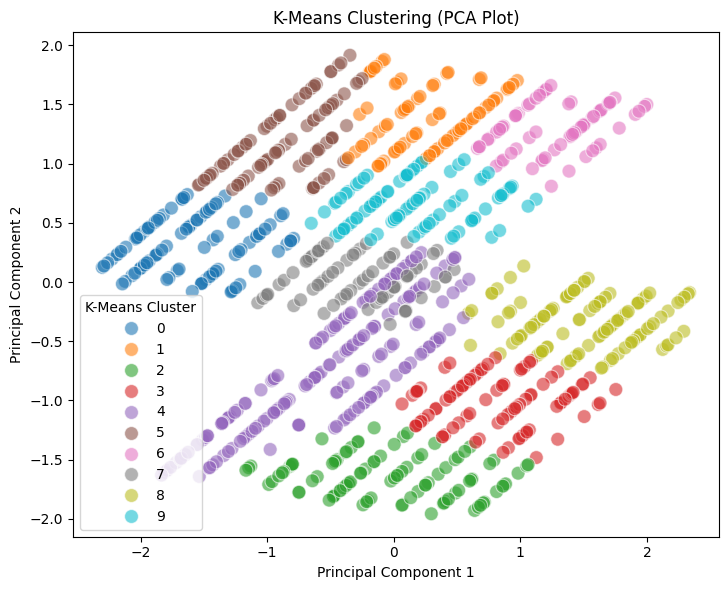

<Axes: xlabel='KMeans_Cluster', ylabel='count'>

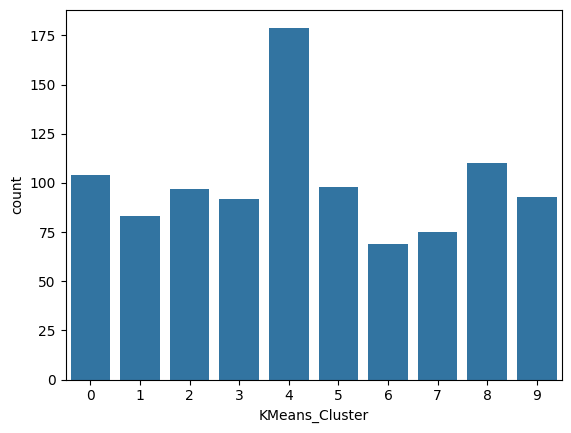

In [65]:
#kmeans  algorithm
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score,davies_bouldin_score
from sklearn.decomposition import PCA

l_e_t_t = LabelEncoder()

df["Transaction_Type_Encoded"] = l_e_t_t.fit_transform(df["Transaction_Type"])

feature = df[["Transaction_Amount", "Transaction_Frequency", "Transaction_Type_Encoded"]]

scaler_kmean = StandardScaler()
f_s = scaler_kmean.fit_transform(feature)

kmeans = KMeans(n_clusters=10, init='k-means++', random_state=42)
k_means_clusters = kmeans.fit_predict(f_s)
df['KMeans_Cluster'] = k_means_clusters

silhouette_avg_kmeans = silhouette_score(f_s, k_means_clusters)
dbi_kmeans = davies_bouldin_score(f_s, k_means_clusters)

print(f'Silhouette Score for kmeans: {silhouette_avg_kmeans}')
print(f'Davies-Bouldin Index for kmeans: {dbi_kmeans}')

pca = PCA(n_components=2)
X_pca = pca.fit_transform(f_s)

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df['KMeans_Cluster'], palette='tab10', s=100, alpha=0.6)
plt.title('K-Means Clustering (PCA Plot)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='K-Means Cluster')
plt.tight_layout()
plt.show()

sns.countplot(x="KMeans_Cluster", data=df)

In [68]:
# Save models
with open('scaler_kmean.pkl', 'wb') as f:
    pickle.dump(scaler_kmean, f)
with open('kmeans.pkl', 'wb') as f:
    pickle.dump(kmeans, f)
with open('l_e_t_t.pkl', 'wb') as f:
    pickle.dump(l_e_t_t, f)

def predict_cluster(transaction_amount, transaction_frequency, transaction_type, scaler, kmeans, l_e_t_t):
    encoded_transaction_type = l_e_t_t.transform([transaction_type])[0]

    input_data = np.array([[transaction_amount, transaction_frequency, encoded_transaction_type]])

    scaled_input_data = scaler_kmean.transform(input_data)

    cluster = kmeans.predict(scaled_input_data)

    return cluster[0]

Transaction_Amount = 145.79
Transaction_Frequency = 7
Transaction_Type = "Withdrawal"
predicted_cluster = predict_cluster(Transaction_Amount, Transaction_Frequency, Transaction_Type, scaler_kmean, kmeans, l_e_t_t)
print(f"The input data belongs to Cluster {predicted_cluster}")

The input data belongs to Cluster 6


In [69]:
df[["Customer_Id","Transaction_Frequency","Transaction_Amount","Transaction_Type","KMeans_Cluster"]]

,Customer_Id,Transaction_Frequency,Transaction_Amount,Transaction_Type,KMeans_Cluster
0,C097,6,1226.02,Withdrawal,9
1,C051,6,184.29,Deposit,8
2,C07,2,200.26,Withdrawal,5
3,C098,2,1402.49,Deposit,4
4,C092,2,1963.15,Deposit,4
...,...,...,...,...,...
995,C040,4,1420.55,Withdrawal,0
996,C043,1,1881.85,Withdrawal,0
997,C019,6,76.20,Withdrawal,1
998,C038,9,965.97,Deposit,3


Silhouette Score for dbscan: 0.35309077507026665
Davies-Bouldin Index for dbscan: 1.319489629887994


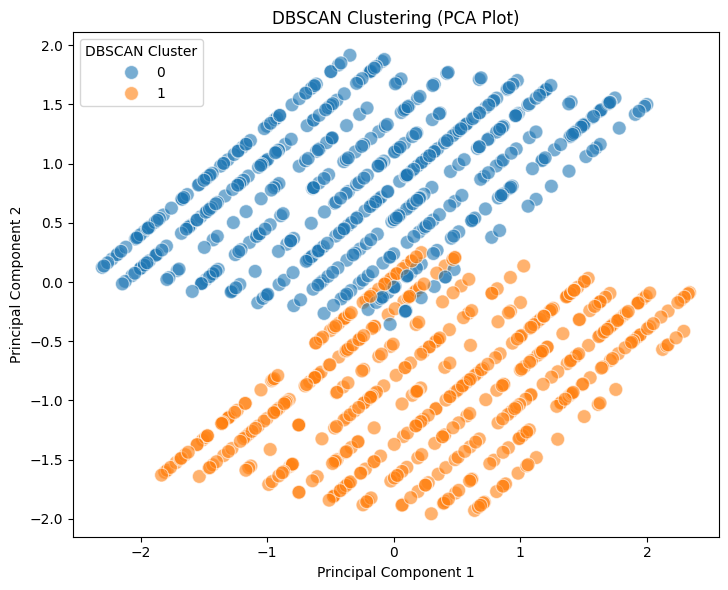

<Axes: xlabel='DBSCAN_Cluster', ylabel='count'>

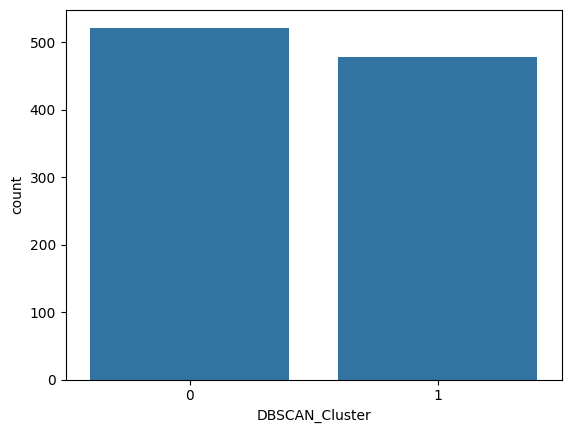

In [72]:
from sklearn.cluster import DBSCAN
l_e_t_t = LabelEncoder()

df["Transaction_Type_Encoded"] = l_e_t_t.fit_transform(df["Transaction_Type"])

feature = df[["Transaction_Amount", "Transaction_Frequency", "Transaction_Type_Encoded"]]

scaler_dbscan = StandardScaler()
f_s = scaler_dbscan.fit_transform(feature)

dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_clusters = dbscan.fit_predict(f_s)
df['DBSCAN_Cluster'] = dbscan_clusters

if len(set(dbscan_clusters))>1:
    silhouette_avg_dbscan = silhouette_score(f_s, dbscan_clusters)
    print(f'Silhouette Score for dbscan: {silhouette_avg_dbscan}')
    dbi_dbscan = davies_bouldin_score(f_s, dbscan_clusters)
    print(f'Davies-Bouldin Index for dbscan: {dbi_dbscan}')
else:
    print("Only 1 Cluster found")


pca = PCA(n_components=2)
X_pca = pca.fit_transform(f_s)

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df['DBSCAN_Cluster'], palette='tab10', s=100, alpha=0.6)
plt.title('DBSCAN Clustering (PCA Plot)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='DBSCAN Cluster')
plt.tight_layout()
plt.show()

sns.countplot(x="DBSCAN_Cluster", data=df)

PRODUCT RECOMMANDATION

K-MEANS NEIGHBOURS ALGORITHM

In [75]:
!pip install surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 3.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp310-cp310-linux_x86_64.whl size=2357265 sha256=2304280b63ad7433b7cd486fc3c907d9e2ec9c07108e4878168d8e8b0c634995
  Stored in directory: /root/.cache/pip/wheels/4b/3f/df/6acbf0a40397d9bf3ff97f582cc22fb9ce66adde75bc71fd54
Successfully built scikit-surprise


In [142]:
from surprise import Dataset, Reader, KNNBasic
from surprise.model_selection import train_test_split

product_mapping = {
    'P01': 'Basic Checking Account',
    'P02': 'Premium Checking Account',
    'P03': 'High-Yield Savings Account',
    'P04': 'Money Market Account',
    'P05': 'Standard Credit Card',
    'P06': 'Gold Credit Card',
    'P07': 'Platinum Credit Card',
    'P08': 'Business Credit Card',
    'P09': 'Personal Loan',
    'P010': 'Home Loan',
    'P011': 'Car Loan',
    'P012': 'Education Loan',
    'P013': 'Mortgage',
    'P014': 'Personal Loan',
    'P015': 'Fixed Deposit',
    'P016': 'Recurring Deposit',
    'P017': 'Investment Fund',
    'P018': 'Car Loan',
    'P019': 'Home Equity Loan',
    'P020': 'Gold Loan',
    'P021': 'Travel Insurance',
    'P022': 'Health Insurance',
    'P023': 'Life Insurance',
    'P024': 'Pet Insurance',
    'P025': 'Business Loan',
    'P026': 'Overdraft Protection',
    'P027': 'Wealth Management Service',
    'P028': 'Retirement Account',
    'P029': 'Savings Account',
    'P030': 'Gold Loan',
    'P031': 'Student Loan',
    'P032': 'Credit Line',
    'P033': 'Investment Advisory',
    'P034': 'Fixed Deposit',
    'P035': 'Trust Services',
    'P036': 'Real Estate Investment',
    'P037': 'Online Savings Account',
    'P038': 'Premium Savings Account',
    'P039': 'Cash Management Account',
    'P040': 'Luxury Credit Card',
    'P041': 'Gold Investment',
    'P042': 'Mutual Fund',
    'P043': 'Bonds',
    'P044': 'Stocks',
    'P045': 'Foreign Exchange Services',
    'P046': 'Financial Planning',
    'P047': 'Estate Planning',
    'P048': 'Long-Term Care Insurance',
    'P049': 'Short-Term Investment',
    'P050': 'Tax Planning'
}


interaction_type_mapping={'Viewed': 1, 'Clicked': 2, 'Purchased': 3}
df = pd.read_csv('dataset.csv')

df["Product_Name"]=df["Product_Id"].map(product_mapping)
df["Interaction_Type"]=df["Interaction_Type"].map(interaction_type_mapping)

reader=Reader(rating_scale=(1,3))
data = Dataset.load_from_df(df[['Customer_Id', 'Product_Id', 'Interaction_Type']], reader)
trainset, testset = train_test_split(data, test_size=0.25)


model = KNNBasic(sim_options={'name': 'cosine', 'user_based': True})
model.fit(trainset)


def recommend_products(customer_id, model, interaction_data, product_mapping, n=5):
    all_products = set(interaction_data['Product_Id'].unique())
    interacted_products = set(interaction_data[interaction_data['Customer_Id'] == customer_id]['Product_Id'])
    products_to_predict = list(all_products - interacted_products)
    predictions = [model.predict(customer_id, product_id) for product_id in products_to_predict]
    top_n_predictions = sorted(predictions, key=lambda x: x.est, reverse=True)[:n]
    recommended_product_ids = [pred.iid for pred in top_n_predictions]
    recommended_products = pd.DataFrame({
        'Product_Id': recommended_product_ids,
        'Product_Name': [product_mapping.get(pid, 'Unknown') for pid in recommended_product_ids]
    })
    return recommended_products

Customer_Id = 'C09'
recommended_products = recommend_products(Customer_Id, model, df, product_mapping, n=5)
print(recommended_products)

predictions = model.test(testset)

Computing the cosine similarity matrix...
Done computing similarity matrix.
  Product_Id               Product_Name
0       P041            Gold Investment
1       P024              Pet Insurance
2       P045  Foreign Exchange Services
3       P028         Retirement Account
4       P044                     Stocks


In [143]:
with open("knn_pro.pkl","wb") as f:
    pickle.dump(model,f)

In [144]:
def precision_at_k(predictions, k=5):
    pred_df = pd.DataFrame(predictions, columns=['uid', 'iid', 'true_r', 'est', 'details'])
    top_k = pred_df.groupby('uid').apply(lambda x: x.nlargest(k, 'est')).reset_index(drop=True)
    top_k['is_relevant'] = top_k['true_r'] >= 2
    relevant_items = top_k.groupby('uid')['is_relevant'].mean()
    return relevant_items.mean()


In [145]:
precision_at_k(predictions)

0.6446360153256705

In [146]:
def recall_at_k(predictions, k=5):
    pred_df = pd.DataFrame(predictions, columns=['uid', 'iid', 'true_r', 'est', 'details'])
    top_k = pred_df.groupby('uid').apply(lambda x: x.nlargest(k, 'est')).reset_index(drop=True)
    top_k['is_relevant'] = top_k['true_r'] >= 2
    recall = top_k.groupby('uid').apply(lambda x: x['is_relevant'].sum() / x['true_r'].count() if x['true_r'].count() > 0 else 0).mean()
    return recall


In [147]:
recall_at_k(predictions)

0.6446360153256705

In [148]:
def mean_average_precision(predictions, k=5):
    pred_df = pd.DataFrame(predictions, columns=['uid', 'iid', 'true_r', 'est', 'details'])
    pred_df = pred_df.reset_index(drop=True)
    top_k = pred_df.groupby('uid').apply(lambda x: x.nlargest(k, 'est')).reset_index(drop=True)
    top_k['is_relevant'] = top_k['true_r'] >= 2
    avg_precisions = top_k.groupby('uid').apply(lambda x: (x['is_relevant'].cumsum() / (x.index + 1)).mean()).mean()
    return avg_precisions


In [149]:

mean_average_precision(predictions)

0.036837915092812555

In [150]:
def ndcg_at_k(predictions, k=5):
    pred_df = pd.DataFrame(predictions, columns=['uid', 'iid', 'true_r', 'est', 'details'])

    def ndcg(user_df):
        user_df = user_df.nlargest(k, 'est')

        user_df['relevance'] = user_df['true_r']

        ideal_relevance = user_df.sort_values('relevance', ascending=False)['relevance']
        ideal_dcg = np.sum((2 ** ideal_relevance - 1) / np.log2(np.arange(2, len(ideal_relevance) + 2)))

        actual_relevance = user_df['relevance']
        actual_dcg = np.sum((2 ** actual_relevance - 1) / np.log2(np.arange(2, len(actual_relevance) + 2)))

        return actual_dcg / ideal_dcg if ideal_dcg > 0 else 0

    ndcg_scores = pred_df.groupby('uid').apply(ndcg)
    return ndcg_scores.mean()


In [151]:
ndcg_at_k(predictions)

0.9027603331395

In [154]:
#hyperparameter tuning
import pandas as pd
import pickle
from surprise import Dataset, Reader, KNNBasic
from surprise.model_selection import train_test_split, GridSearchCV
from surprise import accuracy

product_mapping = {
    'P01': 'Basic Checking Account',
    'P02': 'Premium Checking Account',
    'P03': 'High-Yield Savings Account',
    'P04': 'Money Market Account',
    'P05': 'Standard Credit Card',
    'P06': 'Gold Credit Card',
    'P07': 'Platinum Credit Card',
    'P08': 'Business Credit Card',
    'P09': 'Personal Loan',
    'P010': 'Home Loan',
    'P011': 'Car Loan',
    'P012': 'Education Loan',
    'P013': 'Mortgage',
    'P014': 'Personal Loan',
    'P015': 'Fixed Deposit',
    'P016': 'Recurring Deposit',
    'P017': 'Investment Fund',
    'P018': 'Car Loan',
    'P019': 'Home Equity Loan',
    'P020': 'Gold Loan',
    'P021': 'Travel Insurance',
    'P022': 'Health Insurance',
    'P023': 'Life Insurance',
    'P024': 'Pet Insurance',
    'P025': 'Business Loan',
    'P026': 'Overdraft Protection',
    'P027': 'Wealth Management Service',
    'P028': 'Retirement Account',
    'P029': 'Savings Account',
    'P030': 'Gold Loan',
    'P031': 'Student Loan',
    'P032': 'Credit Line',
    'P033': 'Investment Advisory',
    'P034': 'Fixed Deposit',
    'P035': 'Trust Services',
    'P036': 'Real Estate Investment',
    'P037': 'Online Savings Account',
    'P038': 'Premium Savings Account',
    'P039': 'Cash Management Account',
    'P040': 'Luxury Credit Card',
    'P041': 'Gold Investment',
    'P042': 'Mutual Fund',
    'P043': 'Bonds',
    'P044': 'Stocks',
    'P045': 'Foreign Exchange Services',
    'P046': 'Financial Planning',
    'P047': 'Estate Planning',
    'P048': 'Long-Term Care Insurance',
    'P049': 'Short-Term Investment',
    'P050': 'Tax Planning'
}


interaction_type_mapping={'Viewed': 1, 'Clicked': 2, 'Purchased': 3}
df=pd.read_csv("dataset.csv")

df["Product_Name"]=df["Product_Id"].map(product_mapping)
df["Interaction_Type"]=df["Interaction_Type"].map(interaction_type_mapping)

reader=Reader(rating_scale=(1,3))
data = Dataset.load_from_df(df[['Customer_Id', 'Product_Id', 'Interaction_Type']], reader)
trainset, testset = train_test_split(data, test_size=0.25)

param_grid={
    "k":[5,10,15],
    "sim_options":{"name":["cosine","msd","pearson"],
    "user_based":[True,False]}
}

gs=GridSearchCV(KNNBasic,param_grid,measures=["rmse"],cv=3)
gs.fit(data)

best_knn_model = gs.best_estimator["rmse"]
best_knn_model.fit(trainset)


def recommend_products(customer_id, best_knn_model, interaction_data, product_mapping, n=5):
    all_products = set(interaction_data['Product_Id'].unique())
    interacted_products = set(interaction_data[interaction_data['Customer_Id'] == customer_id]['Product_Id'])
    products_to_predict = list(all_products - interacted_products)
    predictions = [best_knn_model.predict(customer_id, product_id) for product_id in products_to_predict]
    top_n_predictions = sorted(predictions, key=lambda x: x.est, reverse=True)[:n]
    recommended_product_ids = [pred.iid for pred in top_n_predictions]
    recommended_products = pd.DataFrame({
        'Product_Id': recommended_product_ids,
        'Product_Name': [product_mapping.get(pid, 'Unknown') for pid in recommended_product_ids]
    })
    return recommended_products

Customer_Id = 'cust011'
recommended_products = recommend_products(Customer_Id, best_knn_model, df, product_mapping, n=5)
print(recommended_products)

predictions = best_knn_model.test(testset)

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similar

In [155]:
def precision_at_k(predictions, k=5):
    pred_df = pd.DataFrame(predictions, columns=['uid', 'iid', 'true_r', 'est', 'details'])
    top_k = pred_df.groupby('uid').apply(lambda x: x.nlargest(k, 'est')).reset_index(drop=True)
    top_k['is_relevant'] = top_k['true_r'] >= 2
    relevant_items = top_k.groupby('uid')['is_relevant'].mean()
    return relevant_items.mean()
precision_at_k(predictions)

0.701937984496124

In [156]:
def recall_at_k(predictions, k=5):
    pred_df = pd.DataFrame(predictions, columns=['uid', 'iid', 'true_r', 'est', 'details'])
    top_k = pred_df.groupby('uid').apply(lambda x: x.nlargest(k, 'est')).reset_index(drop=True)
    top_k['is_relevant'] = top_k['true_r'] >= 2
    recall = top_k.groupby('uid').apply(lambda x: x['is_relevant'].sum() / x['true_r'].count() if x['true_r'].count() > 0 else 0).mean()
    return recall
recall_at_k(predictions)

0.701937984496124

In [157]:
def mean_average_precision(predictions, k=5):
    pred_df = pd.DataFrame(predictions, columns=['uid', 'iid', 'true_r', 'est', 'details'])
    pred_df = pred_df.reset_index(drop=True)
    top_k = pred_df.groupby('uid').apply(lambda x: x.nlargest(k, 'est')).reset_index(drop=True)
    top_k['is_relevant'] = top_k['true_r'] >= 2
    avg_precisions = top_k.groupby('uid').apply(lambda x: (x['is_relevant'].cumsum() / (x.index + 1)).mean()).mean()
    return avg_precisions
mean_average_precision(predictions)

0.0257197038456207

In [158]:
def ndcg_at_k(predictions, k=5):
    pred_df = pd.DataFrame(predictions, columns=['uid', 'iid', 'true_r', 'est', 'details'])

    def ndcg(user_df):
        user_df = user_df.nlargest(k, 'est')

        user_df['relevance'] = user_df['true_r']

        ideal_relevance = user_df.sort_values('relevance', ascending=False)['relevance']
        ideal_dcg = np.sum((2 ** ideal_relevance - 1) / np.log2(np.arange(2, len(ideal_relevance) + 2)))

        actual_relevance = user_df['relevance']
        actual_dcg = np.sum((2 ** actual_relevance - 1) / np.log2(np.arange(2, len(actual_relevance) + 2)))

        return actual_dcg / ideal_dcg if ideal_dcg > 0 else 0

    ndcg_scores = pred_df.groupby('uid').apply(ndcg)
    return ndcg_scores.mean()
ndcg_at_k(predictions)

0.9055478990693094

In [159]:
#Singular Value Decomposition

In [163]:
from surprise import Dataset, Reader, SVD
product_mapping = {
    'P01': 'Basic Checking Account',
    'P02': 'Premium Checking Account',
    'P03': 'High-Yield Savings Account',
    'P04': 'Money Market Account',
    'P05': 'Standard Credit Card',
    'P06': 'Gold Credit Card',
    'P07': 'Platinum Credit Card',
    'P08': 'Business Credit Card',
    'P09': 'Personal Loan',
    'P010': 'Home Loan',
    'P011': 'Car Loan',
    'P012': 'Education Loan',
    'P013': 'Mortgage',
    'P014': 'Personal Loan',
    'P015': 'Fixed Deposit',
    'P016': 'Recurring Deposit',
    'P017': 'Investment Fund',
    'P018': 'Car Loan',
    'P019': 'Home Equity Loan',
    'P020': 'Gold Loan',
    'P021': 'Travel Insurance',
    'P022': 'Health Insurance',
    'P023': 'Life Insurance',
    'P024': 'Pet Insurance',
    'P025': 'Business Loan',
    'P026': 'Overdraft Protection',
    'P027': 'Wealth Management Service',
    'P028': 'Retirement Account',
    'P029': 'Savings Account',
    'P030': 'Gold Loan',
    'P031': 'Student Loan',
    'P032': 'Credit Line',
    'P033': 'Investment Advisory',
    'P034': 'Fixed Deposit',
    'P035': 'Trust Services',
    'P036': 'Real Estate Investment',
    'P037': 'Online Savings Account',
    'P038': 'Premium Savings Account',
    'P039': 'Cash Management Account',
    'P040': 'Luxury Credit Card',
    'P041': 'Gold Investment',
    'P042': 'Mutual Fund',
    'P043': 'Bonds',
    'P044': 'Stocks',
    'P045': 'Foreign Exchange Services',
    'P046': 'Financial Planning',
    'P047': 'Estate Planning',
    'P048': 'Long-Term Care Insurance',
    'P049': 'Short-Term Investment',
    'P050': 'Tax Planning'
}


interaction_type_mapping={'Viewed': 1, 'Clicked': 2, 'Purchased': 3}
df=pd.read_csv("dataset.csv")

df["Product_Name"]=df["Product_Id"].map(product_mapping)
df["Interaction_Type"]=df["Interaction_Type"].map(interaction_type_mapping)

reader=Reader(rating_scale=(1,3))
data = Dataset.load_from_df(df[['Customer_Id', 'Product_Id', 'Interaction_Type']], reader)
trainset, testset = train_test_split(data, test_size=0.25)

svd_model = SVD()
svd_model.fit(trainset)


def recommend_products(customer_id, svd_model, interaction_data, product_mapping, n=5):
    all_products = set(interaction_data['Product_Id'].unique())
    interacted_products = set(interaction_data[interaction_data['Customer_Id'] == customer_id]['Product_Id'])
    products_to_predict = list(all_products - interacted_products)
    predictions = [svd_model.predict(customer_id, product_id) for product_id in products_to_predict]
    top_n_predictions = sorted(predictions, key=lambda x: x.est, reverse=True)[:n]
    recommended_product_ids = [pred.iid for pred in top_n_predictions]
    recommended_products = pd.DataFrame({
        'Product_Id': recommended_product_ids,
        'Product_Name': [product_mapping.get(pid, 'Unknown') for pid in recommended_product_ids]
    })
    return recommended_products

Customer_Id = 'cust011'
recommended_products = recommend_products(Customer_Id, svd_model, df, product_mapping, n=5)
print(recommended_products)

predictions = svd_model.test(testset)

  Product_Id               Product_Name
0       P027  Wealth Management Service
1       P045  Foreign Exchange Services
2       P032                Credit Line
3       P015              Fixed Deposit
4       P042                Mutual Fund


In [164]:
def precision_at_k(predictions, k=5):
    pred_df = pd.DataFrame(predictions, columns=['uid', 'iid', 'true_r', 'est', 'details'])
    top_k = pred_df.groupby('uid').apply(lambda x: x.nlargest(k, 'est')).reset_index(drop=True)
    top_k['is_relevant'] = top_k['true_r'] >= 2
    relevant_items = top_k.groupby('uid')['is_relevant'].mean()
    return relevant_items.mean()


In [165]:
precision_at_k(predictions)

0.6838951310861424

In [166]:
def recall_at_k(predictions, k=5):
    pred_df = pd.DataFrame(predictions, columns=['uid', 'iid', 'true_r', 'est', 'details'])
    top_k = pred_df.groupby('uid').apply(lambda x: x.nlargest(k, 'est')).reset_index(drop=True)
    top_k['is_relevant'] = top_k['true_r'] >= 2
    recall = top_k.groupby('uid').apply(lambda x: x['is_relevant'].sum() / x['true_r'].count() if x['true_r'].count() > 0 else 0).mean()
    return recall


In [167]:
recall_at_k(predictions)

0.6838951310861424

In [168]:
def mean_average_precision(predictions, k=5):
    pred_df = pd.DataFrame(predictions, columns=['uid', 'iid', 'true_r', 'est', 'details'])
    pred_df = pred_df.reset_index(drop=True)
    top_k = pred_df.groupby('uid').apply(lambda x: x.nlargest(k, 'est')).reset_index(drop=True)
    top_k['is_relevant'] = top_k['true_r'] >= 2
    avg_precisions = top_k.groupby('uid').apply(lambda x: (x['is_relevant'].cumsum() / (x.index + 1)).mean()).mean()
    return avg_precisions


In [169]:
mean_average_precision(predictions)

0.02877130831756984

In [170]:
def ndcg_at_k(predictions, k=5):
    pred_df = pd.DataFrame(predictions, columns=['uid', 'iid', 'true_r', 'est', 'details'])

    def ndcg(user_df):
        # Sort by estimated rating and get the top-k recommendations
        user_df = user_df.nlargest(k, 'est')

        # Calculate relevance for the top-k recommendations
        user_df['relevance'] = user_df['true_r']

        # Calculate ideal DCG
        ideal_relevance = user_df.sort_values('relevance', ascending=False)['relevance']
        ideal_dcg = np.sum((2 ** ideal_relevance - 1) / np.log2(np.arange(2, len(ideal_relevance) + 2)))

        # Calculate actual DCG
        actual_relevance = user_df['relevance']
        actual_dcg = np.sum((2 ** actual_relevance - 1) / np.log2(np.arange(2, len(actual_relevance) + 2)))

        # Return NDCG for the user
        return actual_dcg / ideal_dcg if ideal_dcg > 0 else 0

    # Compute NDCG for each user and return the average
    ndcg_scores = pred_df.groupby('uid').apply(ndcg)
    return ndcg_scores.mean()


In [171]:
ndcg_at_k(predictions)

0.9147303854204228